# Detectron2 Beginner's Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to detectron2! This is the official colab tutorial of detectron2. Here, we will go through some basics usage of detectron2, including the following:
* Run inference on images or videos, with an existing detectron2 model
* Train a detectron2 model on a new dataset

You can make a copy of this tutorial by "File -> Open in playground mode" and make changes there. __DO NOT__ request access to this tutorial.


# Install detectron2

In [1]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 7.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15270, done.
remote: Counting objects: 100% (291/291), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 15270 (delta 152), reused 149 (delta 81), pack-reused 14979
Receiving objects: 100% (15270/15270), 6.29 MiB | 4.19 MiB/s, done.
Resolving deltas: 100% (11014/11014), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.3 MB/s eta 0:00:

In [2]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.1 ; cuda:  cu118
detectron2: 0.6


In [3]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

<class 'numpy.ndarray'>


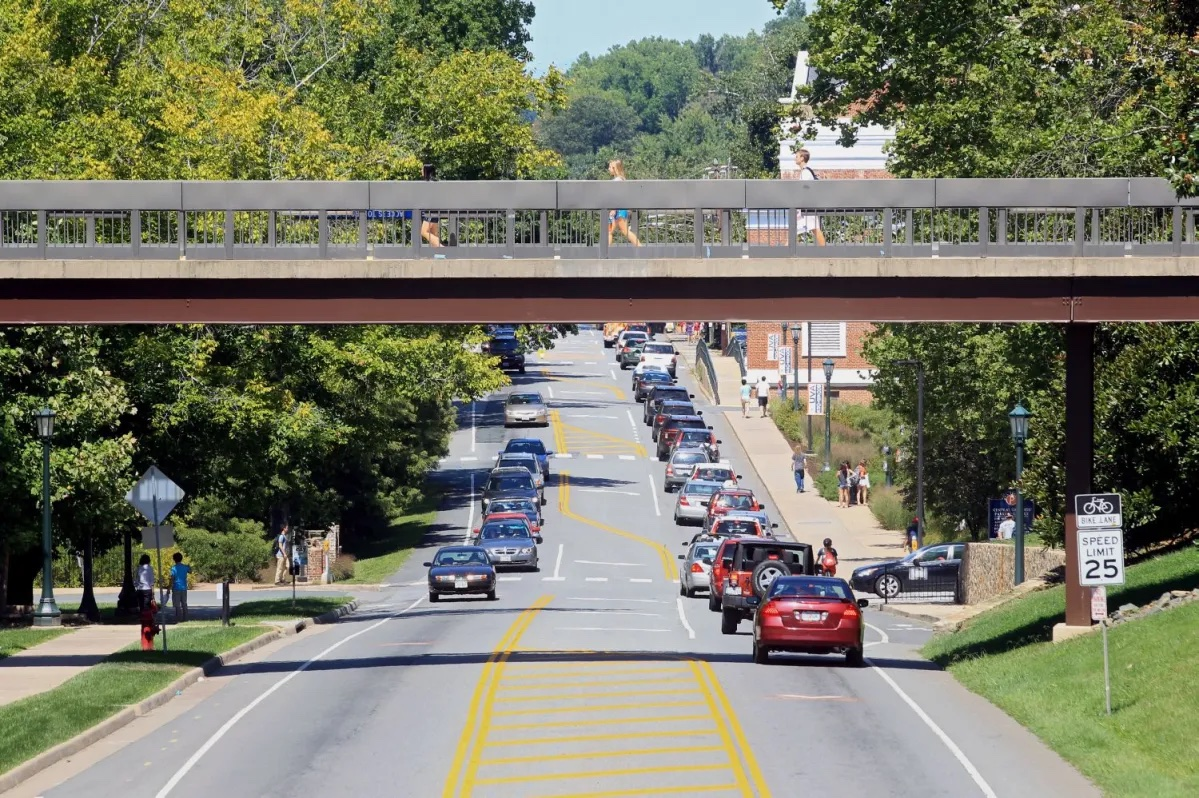

In [6]:
#!wget https://github.com/ajzorn/DS4002Project2/blob/main/Data/cville_roads/cville01.jpeg -q -O input.jpeg
im = cv2.imread("cville01.jpeg")
print(type(im))
cv2_imshow(im)

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [7]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[10/23 02:19:05 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:01, 160MB/s]                           
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [8]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 2,  2,  0,  2,  2,  0,  0,  0,  0,  2,  2,  2,  2,  2,  2,  0,  2,  2,
         0,  2,  0,  2,  2,  2,  2,  2,  0,  2,  0,  0,  0,  2,  0,  0,  2,  0,
         0,  0,  2, 10,  7], device='cuda:0')
Boxes(tensor([[ 424.7697,  544.9634,  499.8242,  600.6973],
        [ 474.2884,  518.3382,  539.8584,  571.2678],
        [ 168.0914,  552.1038,  190.9359,  622.0386],
        [ 752.4507,  575.0117,  867.1321,  663.6957],
        [ 850.5453,  542.0980,  966.7781,  598.9946],
        [ 273.0849,  522.8312,  293.0104,  583.9779],
        [ 134.5022,  553.7355,  155.8764,  613.9822],
        [ 791.6635,  146.4045,  827.0865,  246.0714],
        [ 818.4612,  538.2518,  838.4044,  576.8721],
        [ 502.2093,  392.1840,  548.8344,  428.4940],
        [ 678.8763,  540.7941,  721.4455,  596.8705],
        [ 481.9295,  496.3224,  541.3931,  538.1967],
        [ 487.0853,  462.1351,  542.9117,  509.9804],
        [ 709.4341,  534.7557,  811.8045,  620.7590],
        [ 673.8668,  478.1302,  

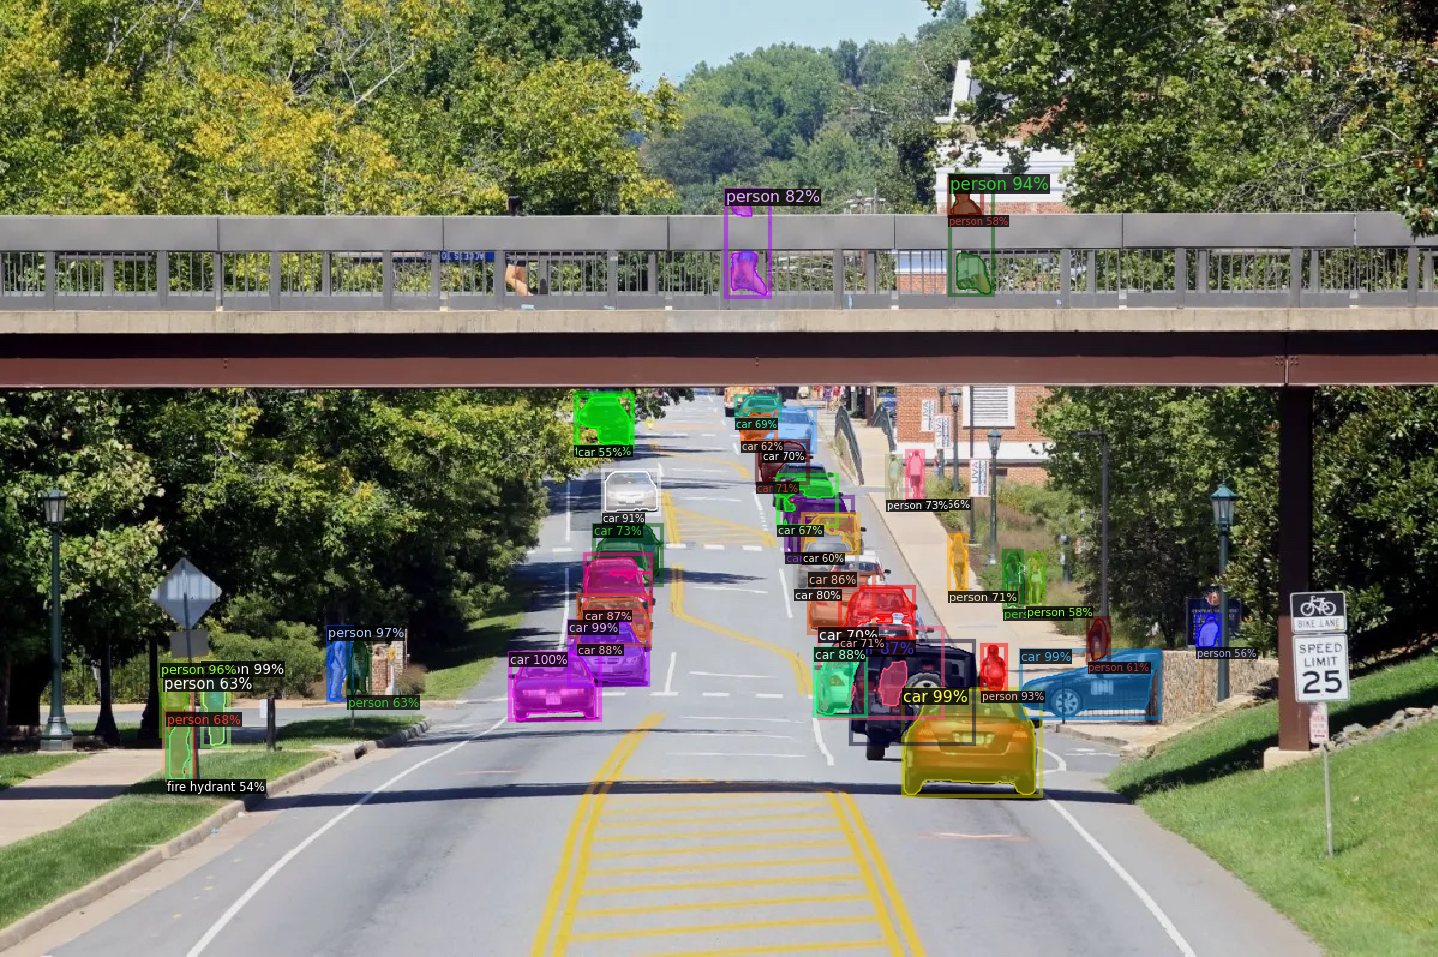

In [9]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

<class 'numpy.ndarray'>


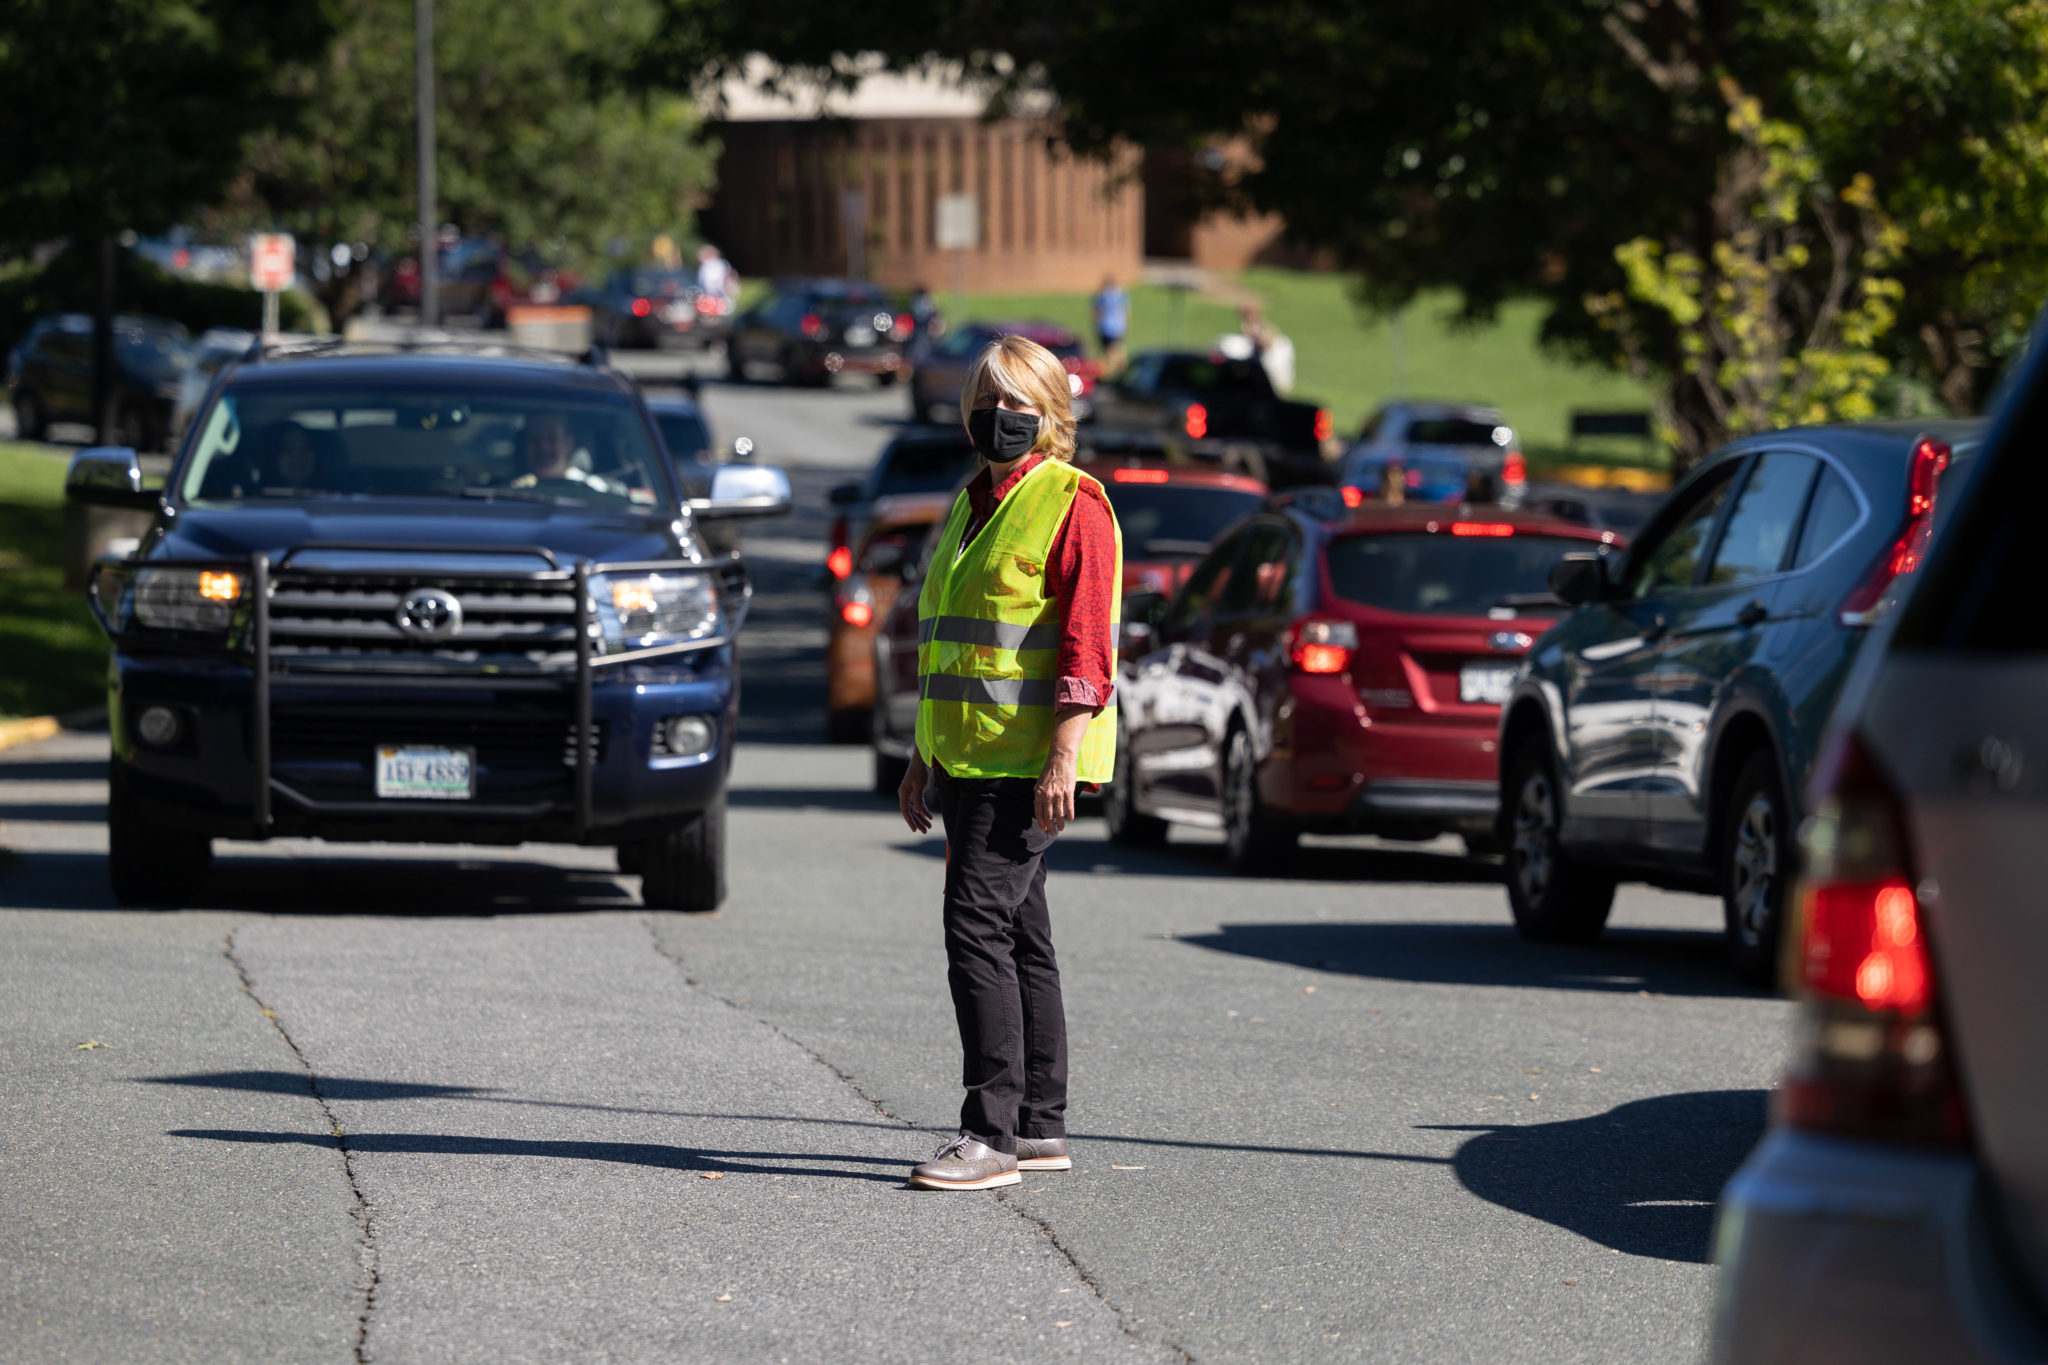

In [11]:
im2 = cv2.imread("cville02.jpeg")
print(type(im2))
cv2_imshow(im2)

In [12]:
#cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im2)

[10/23 02:22:44 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


In [13]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 0,  2,  2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  0,  2,  2,  2,
         2,  0, 11], device='cuda:0')
Boxes(tensor([[ 889.6976,  344.5809, 1119.6599, 1193.8198],
        [   4.8840,  314.0296,  194.4479,  443.2852],
        [ 721.1702,  276.4406,  937.0078,  390.6184],
        [1118.1401,  500.2943, 1613.8070,  880.4638],
        [1332.7178,  397.9209, 1528.7605,  501.6936],
        [1092.7905,  467.5566, 1272.5808,  630.3582],
        [1503.6018,  410.5830, 1966.7098, 1004.3784],
        [ 508.8532,  408.2892,  610.9396,  494.3511],
        [1722.5729,  308.9342, 2048.0000, 1362.1880],
        [1089.7662,  271.5060, 1129.5209,  376.6307],
        [ 586.4660,  261.7801,  737.1937,  355.1672],
        [  77.7064,  336.3064,  754.0817,  918.3884],
        [ 902.5010,  317.3498, 1073.9568,  426.3774],
        [1084.0914,  349.5754, 1341.2910,  477.1125],
        [ 245.5555,  419.8255,  322.6223,  491.8559],
        [ 819.0237,  422.9083,  970.4456,  741.0823],
        [ 16

In [15]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out2 = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out2.get_image()[:, :, ::-1])

AssertionError: ignored